In [ ]:
# Loading the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Loading csv file
df = pd.read_csv("/content/drive/MyDrive/train.csv")

In [ ]:
# Exploring the data
# But this is the total number of labels that
# can be assigned to whole of the dataset
print(f"The number of data points {len(df)}")

The number of data points 22184


<Axes: >

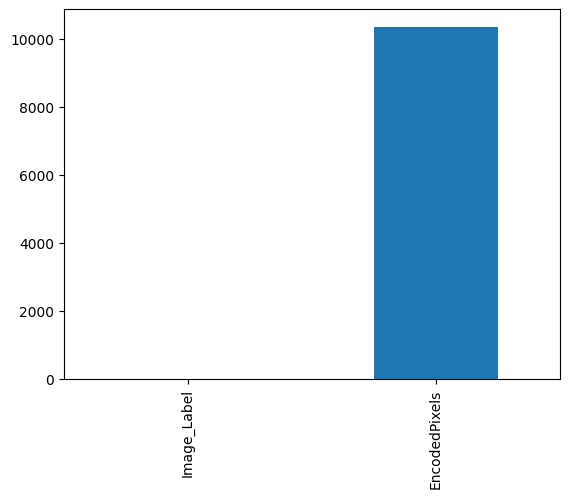

In [ ]:
# Null values in each of the columns
df.isna().sum().plot(kind="bar")

Text(0.5, 1.0, 'Null value percentage')

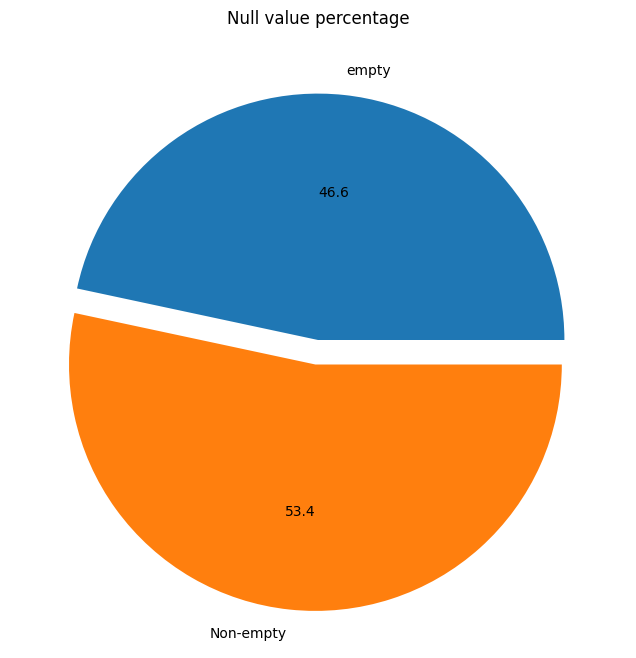

In [ ]:
# Percentage of null values
size = [len(df)-df.EncodedPixels.count(),df.EncodedPixels.count()]
plt.figure(figsize=(8,8))
plt.pie(size, labels=["empty","Non-empty"],explode=(0,0.1), autopct="%1.1f")
plt.title("Null value percentage")

In [ ]:
# Replacing the nan values with 0s
df["EncodedPixels"] = df['EncodedPixels'].fillna(-1)

In [ ]:
# creating a new columns with label
df["Label"] = df["Image_Label"].apply(lambda x: x.split("_")[1])
df.head()

,Image_Label,EncodedPixels,Label
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...,Fish
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...,Flower
2,0011165.jpg_Gravel,-1,Gravel
3,0011165.jpg_Sugar,-1,Sugar
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...,Fish


In [ ]:
# Creating an new feature with just the image names
df["Image_name"] = df["Image_Label"].apply(lambda x: x.split("_")[0])
#df.drop("Image_Label",axis=1,inplace=True)
df.head()

,Image_Label,EncodedPixels,Label,Image_name
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...,Fish,0011165.jpg
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...,Flower,0011165.jpg
2,0011165.jpg_Gravel,-1,Gravel,0011165.jpg
3,0011165.jpg_Sugar,-1,Sugar,0011165.jpg
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...,Fish,002be4f.jpg


{'Fish': 2781, 'Flower': 2365, 'Gravel': 2939, 'Sugar': 3751}


<Axes: title={'center': 'Number of each classes'}>

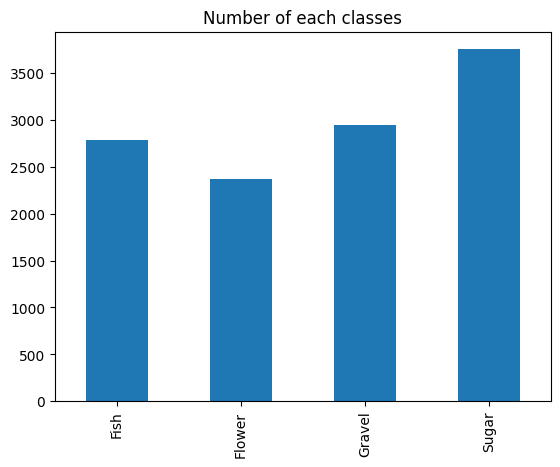

In [ ]:
# Lets check the number of each corresponding labels
def check_num(label):
  return df[(df["Label"]==label) & (df["EncodedPixels"]!=-1)]["EncodedPixels"].count()

values = {}
for i in df.Label.unique():
  values[i] = check_num(i)

print(values)
plt.title("Number of each classes")
pd.Series(values).plot(kind="bar")

In [ ]:
def dummy_var(label):
  values = []
  df_temp = df[df["Label"]==label]
  df_temp["Dummy"] = df_temp["EncodedPixels"].apply(lambda x: 1 if x!=-1 else 0)
  return list(df_temp["Dummy"])

df_images = pd.DataFrame()
df_images["Image"] = df["Image_name"].unique()
for i in df["Label"].unique():
  df_images[i] = dummy_var(i)

df_images.head()

<ipython-input-11-b723581ff755>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["Dummy"] = df_temp["EncodedPixels"].apply(lambda x: 1 if x!=-1 else 0)
<ipython-input-11-b723581ff755>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["Dummy"] = df_temp["EncodedPixels"].apply(lambda x: 1 if x!=-1 else 0)
<ipython-input-11-b723581ff755>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,Image,Fish,Flower,Gravel,Sugar
0,0011165.jpg,1,1,0,0
1,002be4f.jpg,1,1,0,1
2,0031ae9.jpg,1,1,0,1
3,0035239.jpg,0,1,1,0
4,003994e.jpg,1,0,1,1


In [ ]:
# Number of images available for us
print(f"Number of images: {len(df_images)}")

Number of images: 5546


<Axes: title={'center': 'Number of labels per image'}, ylabel='count'>

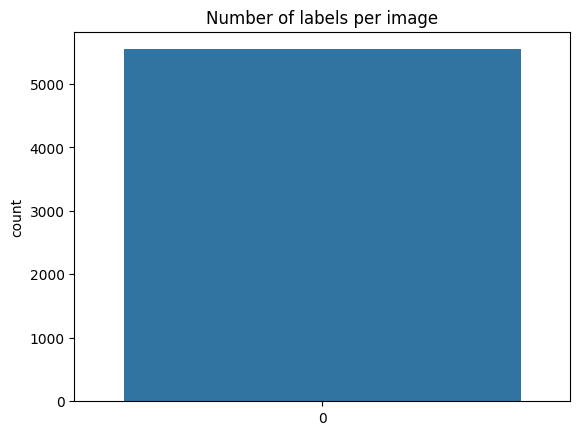

In [ ]:
df_images["Total"] = df_images["Fish"]+df_images["Flower"]+df_images["Gravel"]+df_images["Sugar"]
plt.title("Number of labels per image")
sns.countplot(df_images["Total"])

In [ ]:
# Create one column for each mask
train_df = pd.pivot_table(df, index=['Image_name'], values=['EncodedPixels'], columns=['Label'], aggfunc=np.min).reset_index()
train_df.columns = ['image', 'Fish_mask', 'Flower_mask', 'Gravel_mask', 'Sugar_mask']

train_df.head()

,image,Fish_mask,Flower_mask,Gravel_mask,Sugar_mask
0,0011165.jpg,264918 937 266318 937 267718 937 269118 937 27...,1355565 1002 1356965 1002 1358365 1002 1359765...,-1,-1
1,002be4f.jpg,233813 878 235213 878 236613 878 238010 881 23...,1339279 519 1340679 519 1342079 519 1343479 51...,-1,67495 350 68895 350 70295 350 71695 350 73095 ...
2,0031ae9.jpg,3510 690 4910 690 6310 690 7710 690 9110 690 1...,2047 703 3447 703 4847 703 6247 703 7647 703 9...,-1,658170 388 659570 388 660970 388 662370 388 66...
3,0035239.jpg,-1,100812 462 102212 462 103612 462 105012 462 10...,65400 380 66800 380 68200 380 69600 380 71000 ...,-1
4,003994e.jpg,2367966 18 2367985 2 2367993 8 2368002 62 2369...,-1,353317 416 354717 416 356117 416 357517 416 35...,28011 489 29411 489 30811 489 32211 489 33611 ...


In [ ]:
# dimenesions of image
width = 2100
height = 1400

In [ ]:
# Function to decode the encoded pixels
def decode_pixels(pix, rows=2100, cols=1400,label=255):
  # coverting the string into a list of numbers
  rle_numbers = [int(num_string) for num_string in pix.split(' ')]
  # Coverting them into starting index and length pairs
  rle_pairs = np.array(rle_numbers).reshape(-1,2)
  # Creating a blank image in form of a single row array
  img = np.zeros(rows*cols, dtype=np.uint8)

  # Setting the segmented pixels in the img
  for ind, length in rle_pairs:
    ind -= 1
    img[ind:ind+length] = label
  img = img.reshape(rows,cols)
  img = img.T
  return img

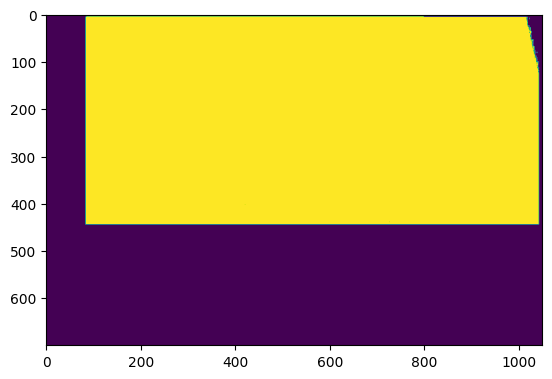

In [ ]:
# Testing the function out
seg = decode_pixels(df["EncodedPixels"][4])
seg = cv2.resize(seg, (1050,700))
plt.imshow(seg)

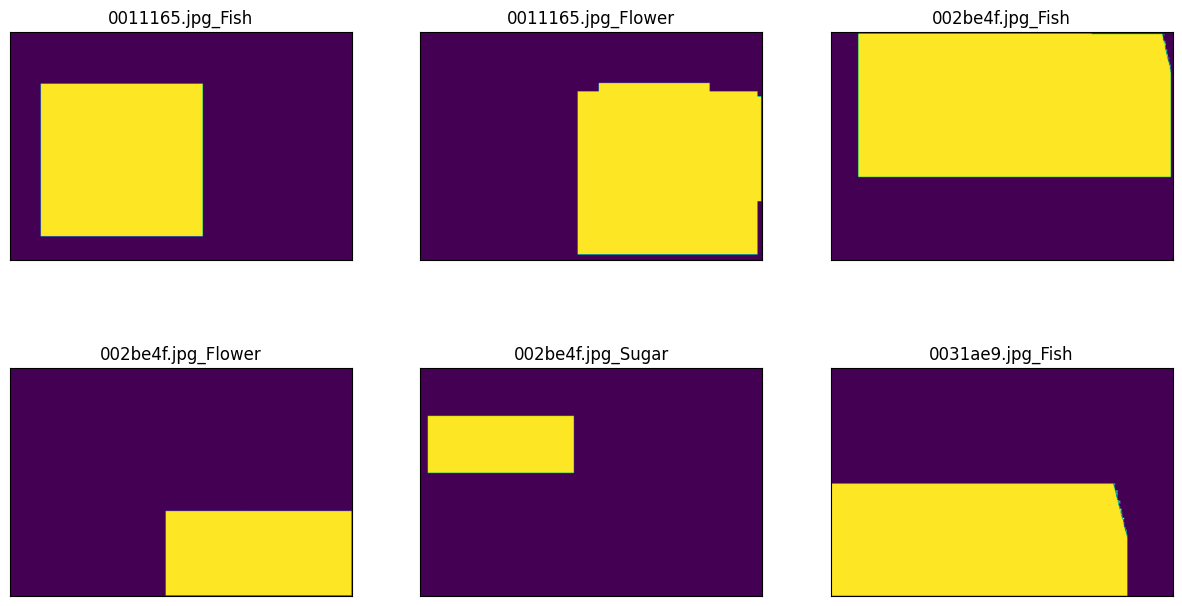

In [ ]:
# Sample of the segment regions
plt.figure(figsize=(15,8))
j = 0
for i in range(6):
  plt.subplot(2,3,i+1)
  while True:
    if df["EncodedPixels"][j]!=-1:
      break
    j+=1
  plt.imshow(decode_pixels(df["EncodedPixels"][j]))
  plt.title(df["Image_name"][j]+"_"+df["Label"][j])
  j+=1
  plt.xticks([])
  plt.yticks([])
plt.show()